In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [2]:
admit_data = pd.read_csv('Admission_Predict.csv')
admit_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
admit_data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

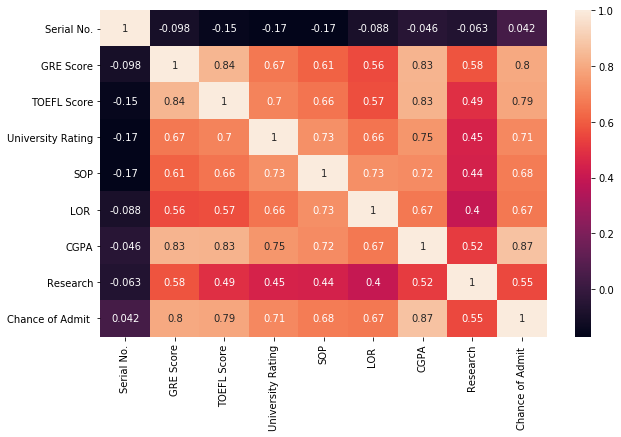

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(admit_data.corr(), annot=True)

Text(0.5,1,'Students with Research Completed')

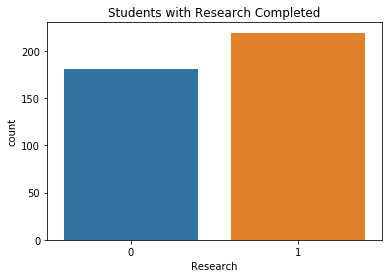

In [8]:
#Chance of Admit correlated with CGPA, GRE, TOEFL (Top 3)
#Check students with research
sns.countplot(x='Research', data=admit_data)
plt.title('Students with Research Completed')

In [11]:
y = np.array([admit_data['TOEFL Score'].min(), admit_data['TOEFL Score'].mean(), admit_data['TOEFL Score'].max()])
x = ['Min', 'Average', 'Max']

Text(0.5,1,'Distribution of TOEFL Scores')

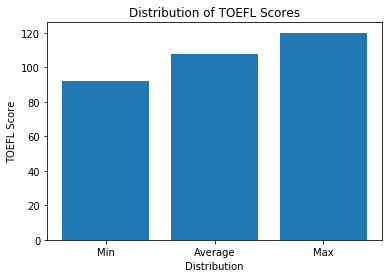

In [13]:
plt.bar(x, y)
plt.xlabel('Distribution')
plt.ylabel('TOEFL Score')
plt.title('Distribution of TOEFL Scores')

Text(0.5,1,'GRE Score Distribution')

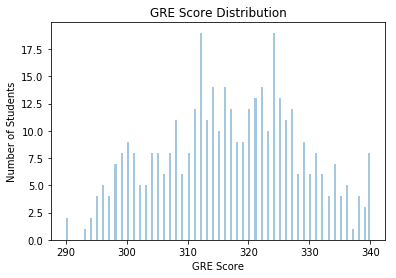

In [18]:
sns.distplot(admit_data['GRE Score'], bins=150, kde=False)
plt.ylabel('Number of Students')
plt.title('GRE Score Distribution')

Text(0.5,1,'CGPA Scores vs University Rating')

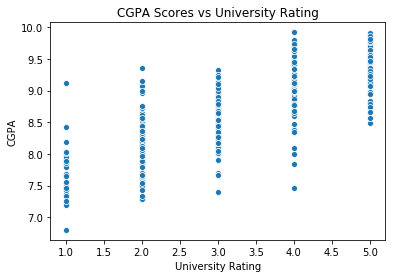

In [20]:
sns.scatterplot(x='University Rating', y='CGPA', data=admit_data)
plt.title('CGPA Scores vs University Rating')

Text(0.5,1,'CGPA vs GRE Score')

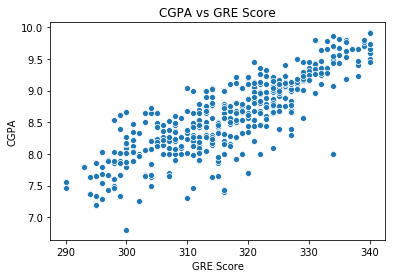

In [22]:
sns.scatterplot(x='GRE Score', y='CGPA', data=admit_data)
plt.title('CGPA vs GRE Score')

Text(0.5,1,'TOEFL vs GRE Score')

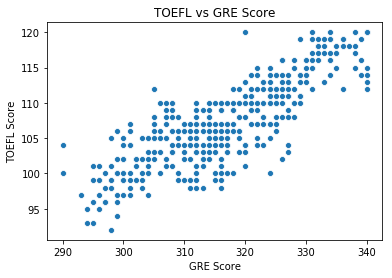

In [37]:
sns.scatterplot(x='GRE Score', y='TOEFL Score', data=admit_data)
plt.title('TOEFL vs GRE Score')

Text(0.5,1,'SOP vs GRE Score')

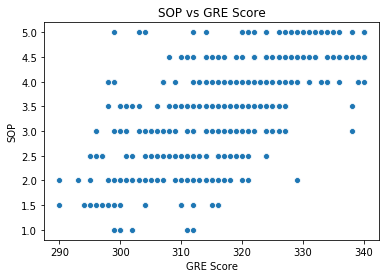

In [40]:
sns.scatterplot(x='GRE Score', y='SOP', data=admit_data)
plt.title('SOP vs GRE Score')

Text(0.5,1,'LOR Score vs University Rating')

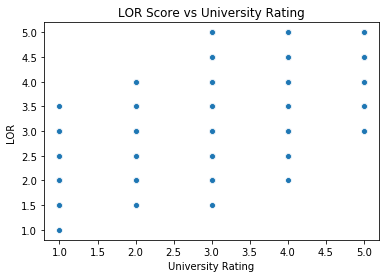

In [45]:
sns.scatterplot(x='University Rating', y='LOR ', data=admit_data)
plt.title('LOR Score vs University Rating')

Text(0.5,1,'University Rating of Students with an 80% Chance')

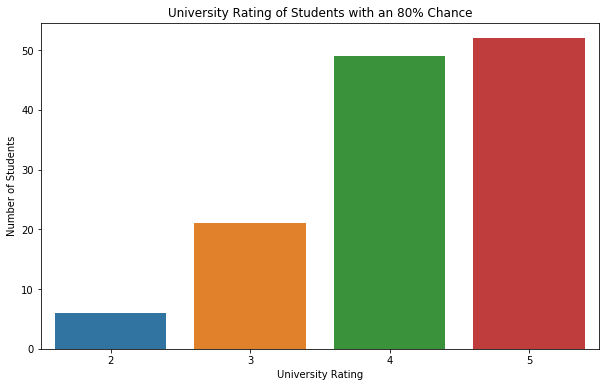

In [36]:
#Students from better universities more likely to get accepted. At 80% acceptance, 1 rated uni students have 0 chance.
above_eighty = admit_data[admit_data['Chance of Admit '] >= 0.8]['University Rating']
plt.figure(figsize=(10,6))
sns.countplot(x=above_eighty)
plt.ylabel('Number of Students')
plt.title('University Rating of Students with an 80% Chance')

In [50]:
#Regression
serial = admit_data['Serial No.'].values
admit_data.drop('Serial No.', axis=1, inplace=True)

In [122]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report

In [104]:
#Split data
X = admit_data.drop('Chance of Admit ', axis=1)
y = admit_data['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

/Users/charlie/anaconda3/envs/py36/lib/python2.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/charlie/anaconda3/envs/py36/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/charlie/anaconda3/envs/py36/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

In [121]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

t0 = time.time()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
print("Real Chance at y_test[5]: " + str(y_test.iloc[5]) + " Prediction: " + str(round(lr_preds[5], 2)))
print("Real Chance at y_test[10]: " + str(y_test.iloc[10]) + " Prediction: " + str(round(lr_preds[10], 2)))
print("R^2 Score: ", round(r2_score(y_test, lr_preds), 2))
print("Time Elapsed (Seconds): ", round(time.time()-t0, 4))

Real Chance at y_test[5]: 0.92 Prediction: 0.95
Real Chance at y_test[10]: 0.83 Prediction: 0.85
('R^2 Score: ', 0.71)
('Time Elapsed (Seconds): ', 0.0045)


In [135]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)

t0 = time.time()
rfr.fit(X_train, y_train)
rfr_preds = rfr.predict(X_test)
print("Real Chance at y_test[5]: " + str(y_test.iloc[5]) + " Prediction: " + str(round(rfr_preds[5], 2)))
print("Real Chance at y_test[10]: " + str(y_test.iloc[10]) + " Prediction: " + str(round(rfr_preds[10], 2)))
print("R^2 Score: ", round(r2_score(y_test, rfr_preds), 2))
print("Time Elapsed (Seconds): ", round(time.time()-t0, 4))

Real Chance at y_test[5]: 0.92 Prediction: 0.94
Real Chance at y_test[10]: 0.83 Prediction: 0.85
('R^2 Score: ', 0.65)
('Time Elapsed (Seconds): ', 0.2365)


In [145]:
from sklearn.tree import DecisionTreeRegressor

t0 = time.time()
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_preds = dtr.predict(X_test)
print("Real Chance at y_test[5]: " + str(y_test.iloc[5]) + " Prediction: " + str(round(dtr_preds[5], 2)))
print("Real Chance at y_test[10]: " + str(y_test.iloc[10]) + " Prediction: " + str(round(dtr_preds[10], 2)))
print("R^2 Score: ", round(r2_score(y_test, dtr_preds), 2))
print("Time Elapsed (Seconds): ", round(time.time()-t0, 4))

Real Chance at y_test[5]: 0.92 Prediction: 0.94
Real Chance at y_test[10]: 0.83 Prediction: 0.86
('R^2 Score: ', 0.44)
('Time Elapsed (Seconds): ', 0.0055)


Text(0.5,1,'Scores of Regression Methods')

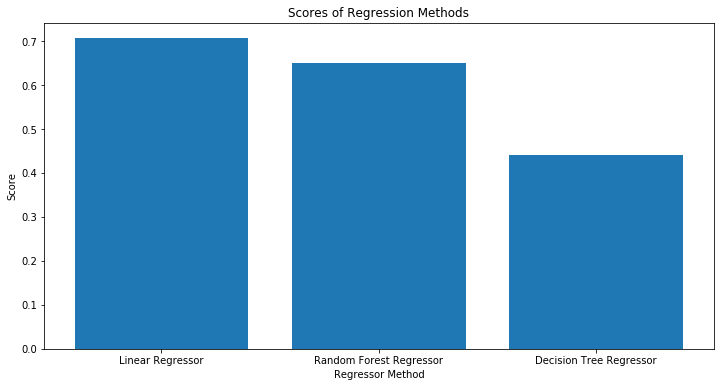

In [149]:
scores = np.array([r2_score(y_test, lr_preds), r2_score(y_test, rfr_preds), r2_score(y_test, dtr_preds)])
reg_labels = ['Linear Regressor', 'Random Forest Regressor', 'Decision Tree Regressor']

plt.figure(figsize=(12,6))
plt.bar(reg_labels, scores)
plt.ylabel('Score')
plt.xlabel('Regressor Method')
plt.title('Scores of Regression Methods')

In [152]:
#Comparison of regressor predictions
print("Linear Regressor Real Chance at y_test[5]: " + str(y_test.iloc[5]) + " Prediction: " + str(round(lr_preds[5], 2)))
print("Random Forest Regressor Real Chance at y_test[5]: " + str(y_test.iloc[5]) + " Prediction: " + str(round(rfr_preds[5], 2)))
print("Decision Tree Regressor Real Chance at y_test[5]: " + str(y_test.iloc[5]) + " Prediction: " + str(round(dtr_preds[5], 2)))
print("\n")
print("Linear Regressor Real Chance at y_test[50]: " + str(y_test.iloc[50]) + " Prediction: " + str(round(lr_preds[50], 2)))
print("Random Forest Regressor Real Chance at y_test[50]: " + str(y_test.iloc[50]) + " Prediction: " + str(round(rfr_preds[50], 2)))
print("Decision Tree Regressor Real Chance at y_test[50]: " + str(y_test.iloc[50]) + " Prediction: " + str(round(dtr_preds[50], 2)))

Linear Regressor Real Chance at y_test[5]: 0.92 Prediction: 0.95
Random Forest Regressor Real Chance at y_test[5]: 0.92 Prediction: 0.94
Decision Tree Regressor Real Chance at y_test[5]: 0.92 Prediction: 0.94


Linear Regressor Real Chance at y_test[50]: 0.72 Prediction: 0.65
Random Forest Regressor Real Chance at y_test[50]: 0.72 Prediction: 0.61
Decision Tree Regressor Real Chance at y_test[50]: 0.72 Prediction: 0.67
